# Data cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


Importing the Data Set


In [2]:
df= pd.read_csv('datasets_20710_26737_Bengaluru_House_Data.csv')
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape #size of the data set to get to know how may data point we are having 


(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count') 
#so we are grouping the data 
#This a catogorical variable as we can see they are divided into various catogories  and the respective count is displayed

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Now Analyse what variables will be dependent on the dependent variable X i.e price

In [5]:
df1= df.drop(['availability','area_type','society','balcony',], axis='columns')
df1.head()
#so here we have removed a few variables to make our code cleaner and interpretable, but we can still depend on few variables 
#but they are being dropped here

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum() # this shows the total number of blank cells/ data, column/feature wise

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2=df1.dropna()
# here we are dropping the null values

In [8]:
df2.isnull().sum()
#used to check whether there any null values anymore


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3 = df2 #copying

In [10]:
df3['size'].unique() #this coloumn is useless unless and until we take the integer values and categorise them properly 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['Bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))
# here we are aquiring the '4' from '4 bhk' which is divided by a space i.e ' ' and then placing them in a column and also explicitly converting them into integers

D:\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df3['Bhk'].unique() # now we can see we have a unique column of no. of bedrooms

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3.head()

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['total_sqft'].unique()



array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here we see that not all values of the row 'total_sqft' are of float type; we write a function to detect the same below:

In [15]:
def is_float(x):
    try:
     float(x)
    except:
        return False
    return True

The line of code below will return a set of rows which do not have 'total_sqft' value as float. This will further help us in making the data computable.

In [16]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,Bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


The following function converts a range into a float value. This takes the average of the upper and the lower bounds of the range that has been mentioned - 

In [17]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
      return float(x)
    except:
      return None

In [18]:
convert_sqft_to_num('2166')

2166.0

In [19]:
convert_sqft_to_num('1145 - 1340')

1242.5

In [20]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
Bhk           0
dtype: int64

This changes all the ranges into a float value.

In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [22]:
df4.head(5)

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
Bhk                   4
Name: 30, dtype: object

# Feature Engineering 


Inserting a new column, price per square feet

In [24]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()



,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
len(df5.location.unique())

1304

Grouping locations according to the <strong> number of times </strong> it has been mentioned in the dataset

In [27]:
df5['location'] = df5['location'].apply( lambda x: x.strip() )
location_stats  = df5.groupby('location')['location'].agg('count').sort_values (ascending = False)
location_stats



location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [28]:
location_stats[location_stats<=10].count()

1052

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [30]:
len(df5.location.unique())

1293

In [31]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
df6 = df5[df5.location != 'other']
df6.shape

(10365, 7)

In [34]:
df6.head(10) 

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [35]:
df6[df6.total_sqft/df6.Bhk > 300].head()
df6.shape

(10365, 7)

In [36]:
df7 = df6[~(df6.total_sqft/df6.Bhk < 300)]
df7.shape

(9933, 7)

In [37]:
df7.price_per_sqft.describe()

count     9906.000000
mean      6009.105632
std       3288.033420
min        371.428571
25%       4192.176352
50%       5250.172771
75%       6719.525257
max      76530.612245
Name: price_per_sqft, dtype: float64

# Outlier Removal

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]    
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out   
        

In [39]:
df8 = remove_pps_outliers(df7)
df8.shape

(7940, 7)

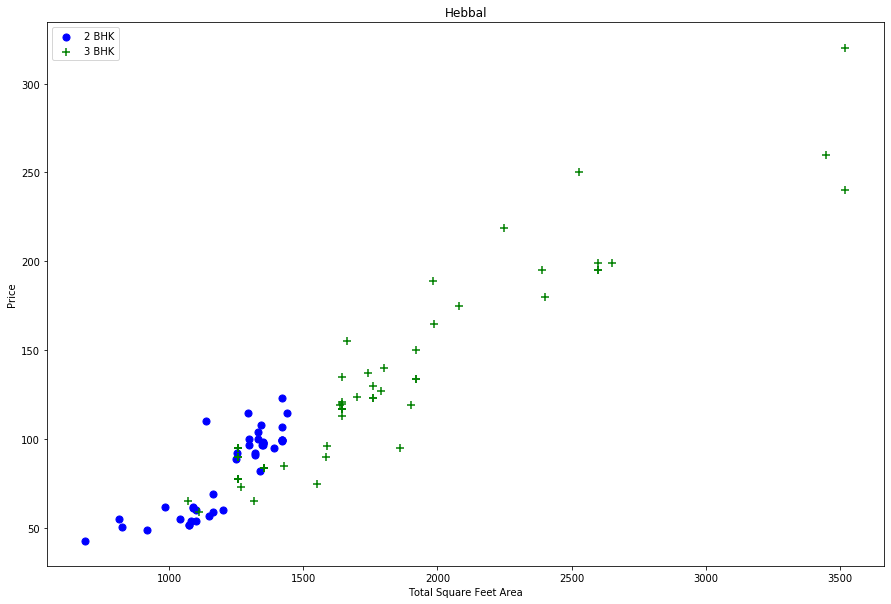

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.Bhk==2)]
    bhk3 = df[(df.location==location) & (df.Bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue' ,label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker= '+',color='green' ,label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df8,"Hebbal")    

In [41]:
def remove_bhk_outliners(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for Bhk, bhk_df in location_df.groupby('Bhk'):
            bhk_stats[Bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for Bhk, bhk_df in location_df.groupby('Bhk'):
            stats = bhk_stats.get(Bhk-1)
            if stats and stats['count']> 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliners(df8)
df9.shape 

(6177, 7)

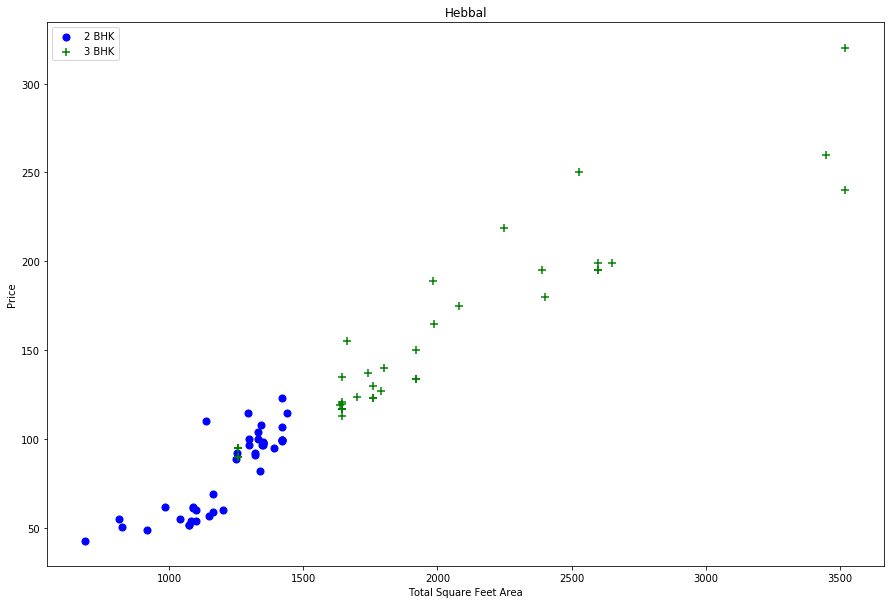

In [42]:
plot_scatter_chart(df9,"Hebbal")    

# Comparision Plots

Text(0, 0.5, 'Count')

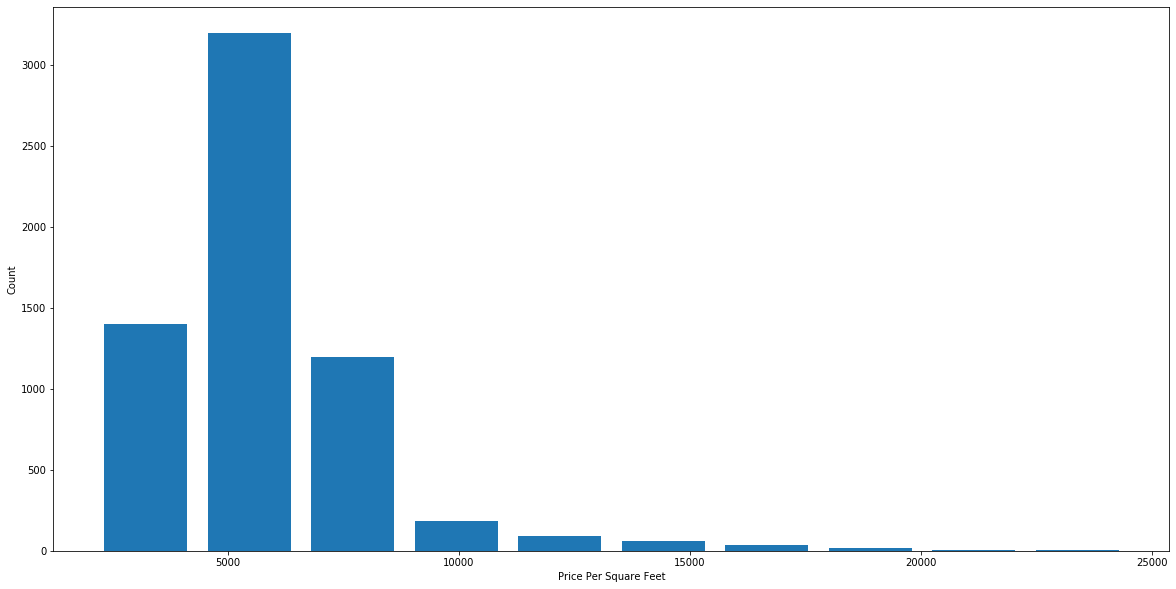

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [44]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12.])

In [45]:
df9[df9.bath>10]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0


Text(0, 0.5, 'count')

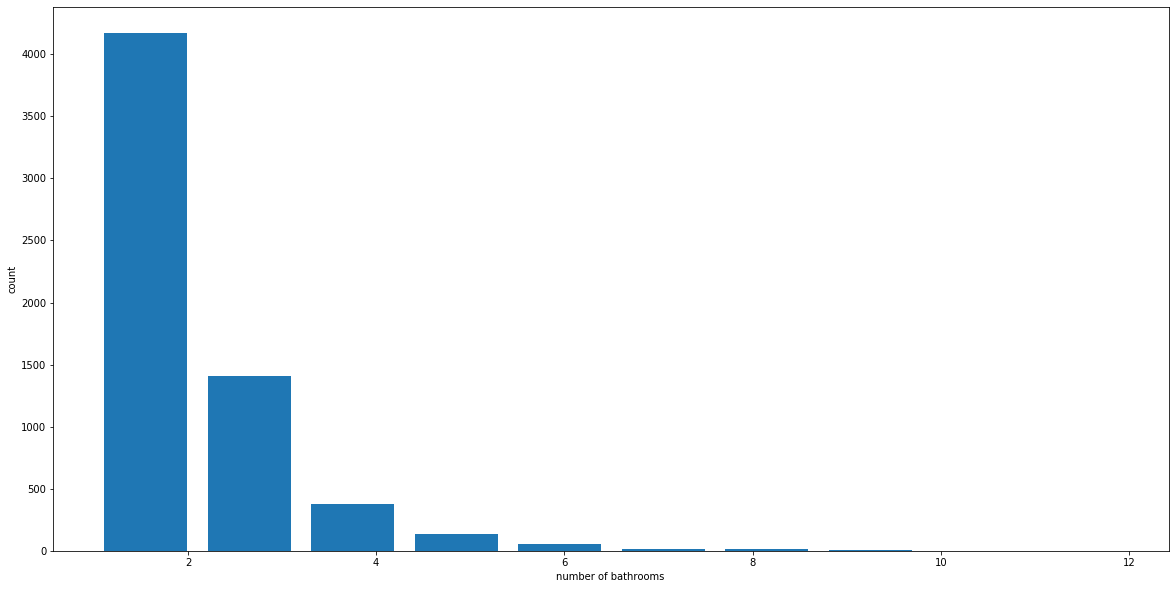

In [46]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel('number of bathrooms ')
plt.ylabel('count')

Text(0, 0.5, 'count')

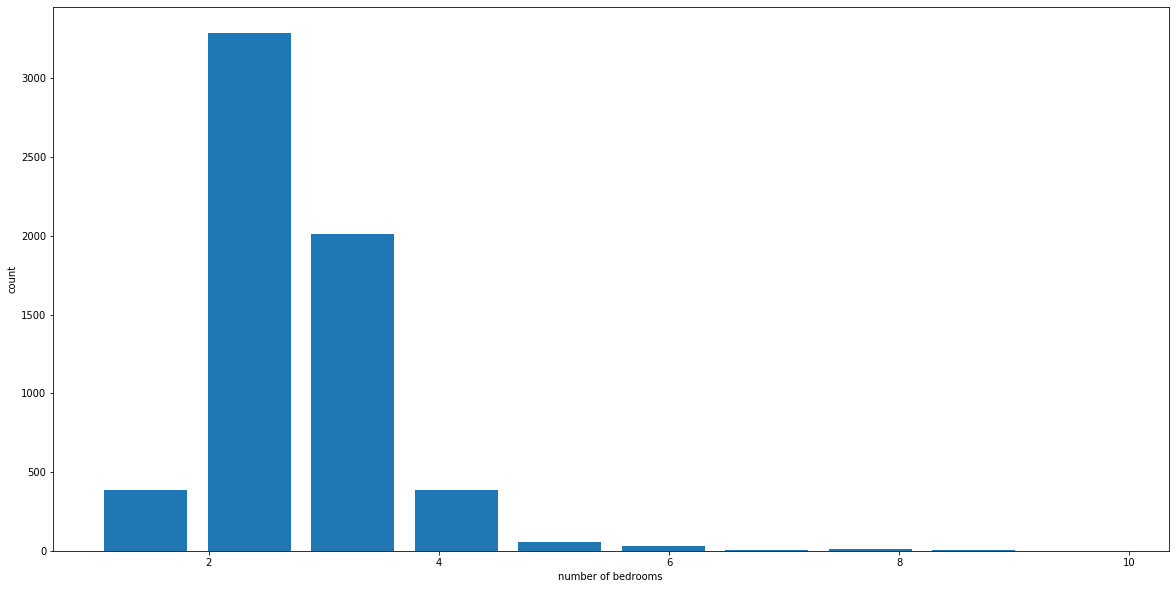

In [47]:
plt.hist(df9.Bhk,rwidth=0.8)
plt.xlabel('number of bedrooms ')
plt.ylabel('count')

In [48]:
df9[df9.bath>df9.Bhk+2]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [49]:
df9= df8[df8.bath<df8.Bhk+2]
df9.shape
df9

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
7935,Yeshwanthpur,3 BHK,1676.0,3.0,92.13,3,5497.016706
7936,Yeshwanthpur,3 BHK,2503.0,3.0,138.00,3,5513.383939
7937,Yeshwanthpur,3 BHK,1855.0,3.0,135.00,3,7277.628032
7938,Yeshwanthpur,3 BHK,1876.0,3.0,160.00,3,8528.784648


In [50]:
df9.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Bhk               0
price_per_sqft    0
dtype: int64

In [51]:
df10= df9.drop(['size','price_per_sqft'],axis="columns")
df10.head(3)


,location,total_sqft,bath,price,Bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Applying the model 

In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 = pd.concat([df10,dummies], axis = 'columns')

In [54]:
df11.drop(['1st Block Jayanagar','location'],axis='columns')

,total_sqft,bath,price,Bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,1676.0,3.0,92.13,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7936,2503.0,3.0,138.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7937,1855.0,3.0,135.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7938,1876.0,3.0,160.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df11.shape

(7868, 246)

In [56]:
df11.isnull().sum()

location              0
total_sqft            0
bath                  0
price                 0
Bhk                   0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 246, dtype: int64

In [57]:
X = df11.drop(['location','price'], axis='columns')

In [58]:
X.head()

,total_sqft,bath,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y= df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.8550495532363503

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)


In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv =ShuffleSplit(n_splits=5, test_size=0.2,random_state =0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84602065, 0.85771299, 0.87985011, 0.85592391, 0.78242103])

In [64]:
def predict_price(model,location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if x[1] <= 0 or x[2]<=0:
        if x[1] <= 0:
            print('Number of Bathrooms cannot be zero')          
    
        if x[2] <= 0:
            print('Number of BHK cannot be zero')
            
        return    
        
    
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [65]:
predict_price(lr,'Marathahalli',2000,2,2)

127.1260776846002

In [66]:
predict_price(lr,'Marathahalli',1700,2,1)

109.44453566964728

In [67]:
predict_price(lr,'Marathahalli',1000,2,0)

Number of BHK cannot be zero


In [68]:
predict_price(lr,'Marathahalli',1000,0,2)

Number of Bathrooms cannot be zero


In [69]:
predict_price(lr,'Marathahalli',1000,0,0)

Number of Bathrooms cannot be zero
Number of BHK cannot be zero
